In [1]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC()
svm.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test, y_test)))

The accuracy on the training subset: 1.000
The accuracy on the test subset: 0.629


C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


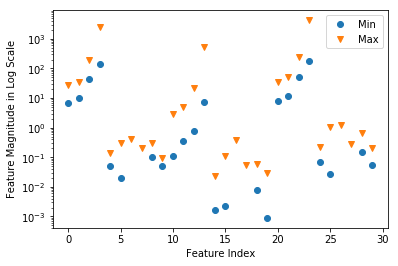

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

In [3]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train

print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

Minimum per feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum per feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [4]:
X_test_scaled = (X_test - min_train)/range_train

svm = SVC()
svm.fit(X_train_scaled, y_train)

C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [5]:
print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.948
The accuracy on the test subset: 0.951


In [6]:
svm = SVC(C=1000)
svm.fit(X_train_scaled, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.988
The accuracy on the test subset: 0.972


C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**Stronger points:**

    - they are versatile
    - can build complex decision boundaries on low-dimensional data
    - can work well on high-dimensional data with relatively small sample size
    etc.

**Weaker points:**

    - don't perform well on high-dimensional data with many samples (i.e. > 100k)
    - preprocessing may be required => implies knowledge and understanding of hyper-parameters
    - harder to inspect and visualize
    etc.

**Alternatives:**

    - DT and Random Forests (require less/no preprocessing of data, easier to understand, inspect, and visualize)

**Good practices:**

    - data scaling
    - other pre-processing
    - choosing an appropriate kernel
    - tuning hyper-parameters: C, gamma, etc.

**The Decision Function**

In [7]:
print('The decision function is:\n\n{}'.format(svm.decision_function(X_test_scaled[:20])))

The decision function is:

[ -4.85978922   1.99579027   3.72514352   2.2759514    4.90872748
   3.38738403   5.5791361    3.65809059   4.35247953   7.58641901
   1.03844859   1.83665248   6.57010973   0.18802654   0.78505785
  -3.91506363   3.36498378  -8.28312921  -7.22330097 -13.2443725 ]


In [8]:
print('Thresholded decision function:\n\n{}'.format(svm.decision_function(X_test_scaled[:20])>0))

Thresholded decision function:

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True False False False]


In [9]:
svm.classes_

array([0, 1])

**Predicting Probabilities**

In [11]:
svm

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
svm = SVC(C=1000, probability=True)
svm.fit(X_train_scaled, y_train)

print('Predicted probabilities for the samples (malignant and benign):\n\n{}'.format(svm.predict_proba(X_test_scaled[:20])))

Predicted probabilities for the samples (malignant and benign):

[[9.98551286e-01 1.44871405e-03]
 [4.64011570e-02 9.53598843e-01]
 [4.35053447e-03 9.95649466e-01]
 [3.18884851e-02 9.68111515e-01]
 [2.11321173e-06 9.99997887e-01]
 [6.94904337e-03 9.93050957e-01]
 [3.25684827e-07 9.99999674e-01]
 [4.77484806e-03 9.95225152e-01]
 [9.97766423e-06 9.99990022e-01]
 [1.20687015e-09 9.99999999e-01]
 [1.56071036e-01 8.43928964e-01]
 [5.72529462e-02 9.42747054e-01]
 [2.05367217e-08 9.99999979e-01]
 [3.75234087e-01 6.24765913e-01]
 [2.08529243e-01 7.91470757e-01]
 [9.94592470e-01 5.40753007e-03]
 [7.16790912e-03 9.92832091e-01]
 [9.99987754e-01 1.22461200e-05]
 [9.99946325e-01 5.36751055e-05]
 [9.99999900e-01 1.00000010e-07]]


C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
svm.predict(X_test_scaled)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])